<a href="https://colab.research.google.com/github/goyalgitesh/lung-cancer-ml-project/blob/main/lung_cancer_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!git clone https://github.com/KalongaM/LungCancerDetection_CNN_SVM_ML.git

fatal: destination path 'LungCancerDetection_CNN_SVM_ML' already exists and is not an empty directory.


In [13]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import datasets, layers, models, applications, optimizers

In [14]:
train_path = os.listdir("/content/LungCancerDetection_CNN_SVM_ML/Dataset/train")
test_path = os.listdir("/content/LungCancerDetection_CNN_SVM_ML/Dataset/test")
print (train_path)
print(test_path)
classes_train = {'normal':0, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib':1, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa':2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa':3}
classes_test = {'normal':0, 'adenocarcinoma':1, 'large.cell.carcinoma':2, 'squamous.cell.carcinoma':3}

['large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'normal', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']
['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']


In [16]:
X_train = []
Y_train = []

X_test = []
Y_test = []

for cls in classes_train:
  pth_train = "/content/LungCancerDetection_CNN_SVM_ML/Dataset/train/"+cls
  print(pth_train)
  for i in os.listdir(pth_train):
    img_train = cv2.imread(pth_train+'/'+i, 0)
    img_train = cv2.resize(img_train, (224, 224))
    X_train.append(img_train)
    Y_train.append(classes_train[cls])

for cls in classes_test:
  pth_test = "/content/LungCancerDetection_CNN_SVM_ML/Dataset/test/"+cls
  for j in os.listdir(pth_test):
    img_test = cv2.imread(pth_test+'/'+j, 0)
    img_test = cv2.resize(img_test, (224, 224))
    X_test.append(img_test)
    Y_test.append(classes_test[cls])

/content/LungCancerDetection_CNN_SVM_ML/Dataset/train/normal
/content/LungCancerDetection_CNN_SVM_ML/Dataset/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
/content/LungCancerDetection_CNN_SVM_ML/Dataset/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
/content/LungCancerDetection_CNN_SVM_ML/Dataset/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [17]:
# Check data
np.unique(Y_train)

array([0, 1, 2, 3])

In [18]:
np.unique(Y_test)

array([0, 1, 2, 3])

In [19]:

# Convert to Array
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [20]:
pd.Series(Y_train).value_counts()

1    195
3    155
0    148
2    115
dtype: int64

In [21]:
pd.Series(Y_test).value_counts()

1    120
3     90
0     54
2     51
dtype: int64

In [22]:
# View the dimensionallity of the data
X_train.shape

(613, 224, 224)

In [23]:
X_test.shape

(315, 224, 224)

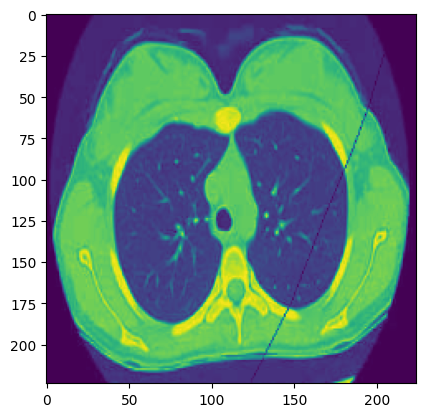

In [24]:
plt.imshow(X_train[0])

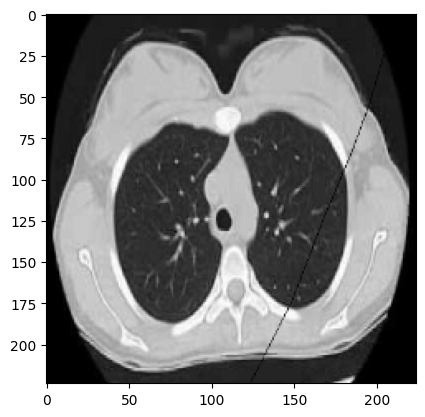

In [25]:
plt.imshow(X_test[0], cmap = 'gray')

In [26]:

# Convert the data into a 2-Dimensional data rather than 3-Dimensional
x_train_updated = X_train.reshape(len(X_train), -1)
x_train_updated.shape

(613, 50176)

In [27]:

# Convert the data into a 2-Dimensional data rather than 3-Dimensional
x_test_updated = X_test.reshape(len(X_test), -1)
x_test_updated.shape

(315, 50176)

In [28]:

# Split the data

#xtrain, xtest, ytrain, ytest = train_test_split(x_updated, Y, random_state=10, test_size = .20)

xtrain = x_train_updated
xtest = x_test_updated
ytrain = Y_train
ytest = Y_test

In [29]:

xtrain.shape, xtest.shape

((613, 50176), (315, 50176))

In [30]:

# Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

xtrain = xtrain/255
xtest = xtest/255

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [31]:
print(xtrain.shape, xtest.shape)
pca = PCA(0.98)

pca_train = xtrain
pca_test = xtest

(613, 50176) (315, 50176)


In [32]:

# Train the Model
svm_model = SVC(kernel ='rbf', C = 100)
svm_model.fit(pca_train, ytrain)

SVC(C=100)

In [33]:
# Evaluate Model
train_result = svm_model.score(pca_train, ytrain)
test_result = svm_model.score(pca_test, ytest)
print("The Training Score is: ", train_result)
print("The Test Score is :", test_result)

The Training Score is:  0.99836867862969
The Test Score is : 0.6063492063492063


In [34]:

# Prediction
y_predict = svm_model.predict(pca_test)

In [35]:
#Conusion Matrix
confusion = confusion_matrix(ytest, y_predict)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[54  0  0  0]
 [ 0 68 42 10]
 [ 0  6 42  3]
 [ 0 46 17 27]]


In [36]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(ytest, y_predict)))


Accuracy: 0.61



In [38]:
print('Classification Report')
print(classification_report(ytest, y_predict, target_names=['Normal_Cell', 'Adenocarcinoma','Large_Cell_Carcinoma', 'Squamous_Cell_Carcinoma']))

Classification Report
                         precision    recall  f1-score   support

            Normal_Cell       1.00      1.00      1.00        54
         Adenocarcinoma       0.57      0.57      0.57       120
   Large_Cell_Carcinoma       0.42      0.82      0.55        51
Squamous_Cell_Carcinoma       0.68      0.30      0.42        90

               accuracy                           0.61       315
              macro avg       0.66      0.67      0.63       315
           weighted avg       0.65      0.61      0.60       315

